In [1]:
%pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1 ##
A small café tracks its daily sales for three products: coffee, sandwiches, and cakes. The sales for three days are recorded as:
Day 1: [100 coffees, 50 sandwiches, 30 cakes]
Day 2: [120 coffees, 70 sandwiches, 40 cakes]
Day 3: [90 coffees, 60 sandwiches, 20 cakes]
The prices for the products are:
Coffee: $2 each
Sandwich: $5 each
Cake: $4 each
Represent the sales and prices as matrices.
Compute the total revenue for each day using matrix multiplication.
Calculate the transpose of the sales matrix and explain its significance.

In [4]:
# here, in the sales matrix, each row represents a product and each column represents a day
sales = np.array([[100, 120, 90],
                  [50, 70, 60],
                  [30, 40, 20]])

prices = np.array([[2,5,4]])

In [5]:
revenue = np.dot(prices, sales)
print(revenue)

[[570 750 560]]


In [6]:
transpose = sales.T
print(transpose)

[[100  50  30]
 [120  70  40]
 [ 90  60  20]]


After transposing the sales matrix, the orientation is inersed, thus now column represents a product and each row represents a day.
The signinficance of transpose of matrix are as follow:
1. Transpose of matrix is used to convert non squared matrix to be in desired orientation making it suitable for matrix multiplication.
2. PCA involves eigenvector decomposition of the covariance matrix. Transpose is used to compute the covariance matrix and project data onto the principal components.
3. The transpose is used in transformations such as rotations, projections, and changing coordinate systems in computer vision and natural language processing.

## Question 2 ##
A delivery company is testing a new algorithm to optimize delivery routes. The company uses a simple cost function:
C(x)=(x-3)^2 + 5
Use gradient descent to minimize the cost function. Start with x=10, a learning rate of 0.1, and run for 15 iterations.
Plot the cost at each iteration.
Explain how gradient descent helps find the optimal route in real-world scenarios.

In [7]:
# initial values given by the queston
x = 10
learning_rate = 0.1
iterations = 15

#store history for x and cost
x_history=[]
cost_history = []

In [8]:
for i in range(iterations):
    cost = ((x-3) ** 2) - 5 #given cost function
    gradient = 2 * (x-3) #slope of given function
    
    x_history.append(x)
    cost_history.append(cost)
    
    x -= learning_rate * gradient #this comes from the formula of gradient descent

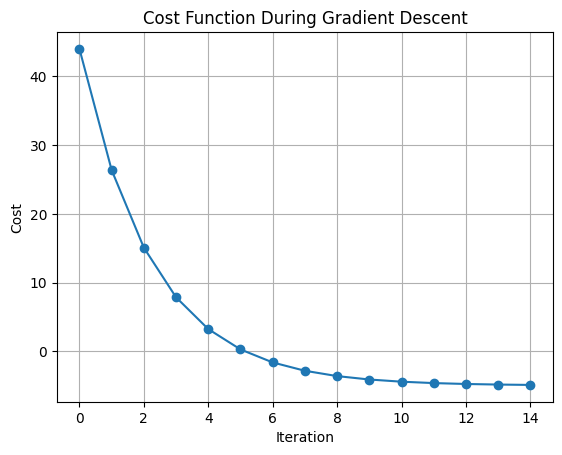

Optimal x: 3.2462906046218243
Minimum cost: -4.939340938075016


In [9]:
plt.plot(range(iterations), cost_history, marker='o')
plt.title('Cost Function During Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid()
plt.show()

print(f"Optimal x: {x}")
print(f"Minimum cost: {((x-3) ** 2) - 5}")

## Question 3 ##
The accuracy of a machine learning model is measured using the function:
A(w) = -w^2 + 4w + 6
where w is a weight parameter.
Find the derivative of A(w)and determine the weight www that maximizes the accuracy.
Plot the function A(w) and its derivative to verify your solution.
Discuss how gradients are used in machine learning to adjust weights for better accuracy.

In [10]:
#This type of expression is used to define a function like f(x) = function of x
A = lambda w: -w**2 + 4*w + 6

# Thist function returns a list of numbers of approx derivatives
def derivative(A, w, h=1e-5):
    return (A(w + h) - A(w - h)) / (2 * h)

#Generate 100 equally spaced value of w between -10 and 14
w = np.linspace(-10, 14, 100)
deriv_A = derivative(A,w)

#Find the index where there is minimum value in w list
min_index = np.argmin(np.abs(deriv_A))
max_w = w[min_index]

accuracy = A(w)

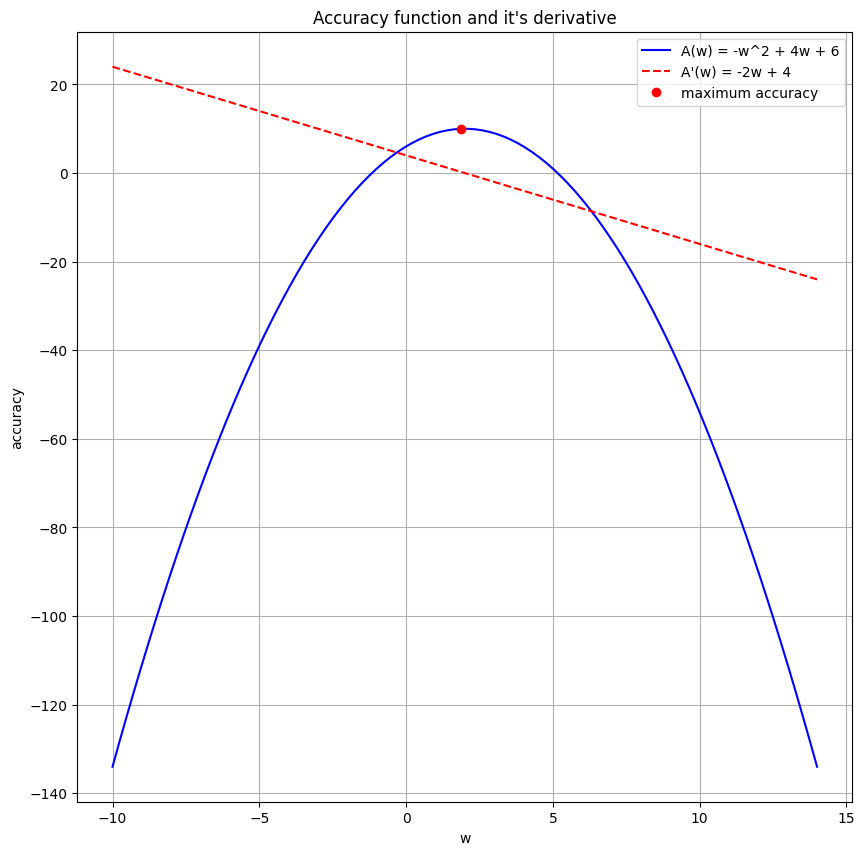

In [11]:
plt.figure(figsize=(10,10))
plt.plot(w, accuracy, label='A(w) = -w^2 + 4w + 6', color="blue")
plt.plot(w, deriv_A, label='A\'(w) = -2w + 4', color="red", linestyle='--')
plt.plot(max_w, A(max_w), marker="o", color="red", label="maximum accuracy", linestyle="none")
plt.title("Accuracy function and it's derivative")
plt.xlabel("w")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

In machine learning, gradients are used to optimize a function, like accuracy in this case. Gradient gives the steepest slope. In real world, gradients are used to adjust weight based on the gradient so that the path converges towards optimal value ensuring that the model learns and improve its prediction. Basically it is used to prevent overshoots and low converging speed.